# __Génétique Humaine Méthodologie__

## **TP: Étude d'association pan-génomique dans le diabète de type 1:**

*Claire Vandiedonck et Fabien Fauchereau - 2022*

>`Contenu de ce notebook:`
> *temps estimé = 1h max*
>
> 0. Synopsis
> 1. Étape 1.</u> Évaluation de la faisabilité de l'étude:
>      <br>1.a. Identification des régions déjà connues pour leur association au DT1 de manière significative
>      <br>1.b. Calcul de puissance pour retrouver les mêmes régions ou d’autres variants avec effets similaires dans une nouvelle cohorte    
> 
> La suite de la session 1 portant sur le début de l'étape 2 se fera dans le notebook `T1D_GWAS_session1_etape2_start.ipynb`



---
## **Avant d'aller plus loin**

<div class="alert alert-block alert-danger"><b>Caution:</b> 
Ne travaillez pas directement sur ce notebook. Dupliquez-le et renommez-le par exemple avec vos initiales et travaillez sur cette nouvelle copie : dans le panneau de gauche, faites un clic droit sur le fichier et sélectionnez "Duplicate"<br>
N'oubliez pas de sauvegarder régulièremeny votre notebook.
</div>

<div class="alert alert-block alert-info"> 
    
<b>Rappel</b>, dans un notebook :

- la combinaison de touches <kbd>Ctrl</kbd>+<kbd>Entrée</kbd> exécute une cellule.<br>
- la combinaison de touches <kbd>Shift</kbd>+<kbd>Entrée</kbd> exécute une cellule puis passe à la suivante. C'est équivalent à cliquer sur l'icone ▶️ dans la barre de menu du notebook.<br>
- la combinaison de touches <kbd>Alt</kbd>+<kbd>Entrée</kbd> exécute une cellule puis en crée une nouvelle (vide) en dessous.<br>
- pour ajouter une cellule, vous pouvez aussi cliquer sur l'icone ➕ dans la barre de menu du notebook.<br>
- vous pouvez déplacer les cellules pour les réorganiser les unes en-dessous des autres.<br>
- vous pouvez ajouter des commentaires, soit en commençant la ligne par un "#" dans une cellule de code (ces lignes ne seront pas éxécutées), soit dans une nouvelle céllule de type Markdown.<br>
- vous sélectionner le type de cellule dans le menu en haut de votre notebbok.<br>
    - "Code" pour entrer des lignes de commande à éxécuter <br>
    - "Markdown pour ajouter du texte balisé qui peut être formatté<br>
- pour modifier une cellule ̀Markdown, double-cliquez dessus<br>
- attention à la casse des caractères pour les cellules de code<br>
- évitez les caractères spéciaux dans les cellules de code<br>

    

 </div>    

***Useful links***    
*To make nice html reports with markdown:* [html visualization tool1](https://dillinger.io/) or [html visualization tool2](https://stackedit.io/app#) and [to draw nice tables](https://www.tablesgenerator.com/markdown_tables ) and the [Ultimate guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)   
*Further reading on JupyterLab notebooks:*  https://jupyterlab.readthedocs.io/en/latest/user/notebook.html <br>
*Here we are using JupyterLab interface implemented as part of the https://plasmabio.org/ project lead by Sandrine Caburet, Pierre Poulain and Claire Vandiedonck.*


---


__*=> A propos de ce jupyter notebook*__

Pour ce TP, nous aurons besoin d'éxécuter du code `bash` at `R`. On pourrait réaliser le TP directement dans un terminal `bash` en lançant R à la volée.

>_If you want to see this by yourself, you can open a terminal on adenine:_
>- _in the `File` menu in the top bar, select `New Launcher` or click on the `+` sign below_
>- _open either a bash `Console` or a `Terminal`_
>- _you'll be able to copy and paste the commands from the `Code` cells of the notebook in the "bottom cell" (for the console) or after the `$` sign (for the terminal)_
>
>_This is for your information only, and not needed. All the commands are already included in this notebook_

Toutefois, nous préférons utiliser un notebook pour rédiger un rapport computationel. Or un notebook jupyter ne peut contenir qu'un seul langage à la fois. Nous avions trois solutions pour éxécuter malgré tout des commandes bash et R dans le même notebook:

**1.** utiliser un notebokk avec un noyau  `bash` et éxécuter des commandes `R`, une par une, en tapant `R -e "myRcommand"` ou exécuter un script R contenant plusieurs commandes en tapant `Rscript myscript.R`.

**2.** utiliser un notebook avec un noyau `R` et éxécuter des commandes `bash` en invoquant la function `system("mybashcommand")`.

**3.** utiliser un notebook avec un noyau `python` et indiquer que les cellules doivent être éxécutées en bash (natif) en ajoutant `%%bash` au début de chaque cellule, et en ajoutant `%%R` au début de chaque cellule `R` après avoir installé et chargé `Rpy2` au début du notebook.

=> <mark> Nous avons opté pour cette 3ème option avec un jupyter notebook de type  python </mark> qui a l'avantage de ne pas alourdir les commandes `bash` et `R` et d'être très lisible. Les informations de configuration de ce notebook et de l'environnement jupyterlab associé sont disponibles à ce lien: https://github.com/CVandiedonck/HumanGeneticsMethodology_GWAS 

Avant de commencer, nous devons donc charger le module `Rpy2` avec la commande suivante.

In [1]:
%load_ext rpy2.ipython

Vous pouvez éxécuter cette commande python pour connaître votre répertoire de travail puis lister ce qu'il contient.

In [2]:
import os 
os.getcwd()

'/srv/home/cvandiedonck/m1meg_ghm_gwas'

<div class="alert alert-block alert-warning"><b>Le résultat devrait ressembler à :</b>"/srv/home/mylogin/m1meg_ghm_gwas" avec votre login. Si ce n'est pas le cas, changez de répertoire avec la commande "os.chdir('path')"</div>

Pour lister ce qu'il contient, vous pouvez tenter avec les 3 langages:
- en python:

In [3]:
os.listdir()

['.jupyter',
 'stratifwithoutld_pcplot.Rout',
 'T1D_GWAS_session1-Copy1.ipynb',
 '.conda',
 'output',
 '.gitignore',
 'T1D_GWAS_session1.html',
 'ng.3245.pdf',
 '.git',
 'output.autosomic.bed',
 '.config',
 'test2',
 '.local',
 'plink.fam',
 'dup.toexclude.txt',
 'T1D_GWAS_session2.ipynb',
 'preparation_L2_SPS_TP07_2020_2021.ipynb',
 'test.log',
 'L2_SPS_TP07_2020_2021.ipynb',
 '.yarn',
 'tp_gwas_commands.sh',
 'same_position.toexclude.txt',
 '.profile',
 'output.autosomic.log',
 '.bashrc',
 'input',
 '.bash_logout',
 'T1D_GWAS_session1.ipynb',
 'nodup.toexclude.txt',
 'T1D_GWAS_session3_tests.ipynb',
 '.ipynb_checkpoints',
 '.RData',
 'plink.log',
 '.empty',
 'output.autosomic.bim',
 'T1D_GWAS_session1_etape1.ipynb',
 'T1D_GWAS_session1_etape1._correction.ipynb',
 'output.autosomic.fam',
 'allelictest.log',
 'T1D_GWAS_session2_correction.ipynb',
 'T1D_GWAS_session3_correction.ipynb',
 'warning.txt',
 'T1D_GWAS_session1_correction.ipynb',
 'FrenchGWAS',
 'T1D_GWAS_session3.ipynb',
 'da

- en bash:

In [4]:
%%bash
ls

allelictest.log
binder
data_analysis_notebook_Python.ipynb
dup.toexclude.txt
FrenchGWAS
input
L2_SPS_TP07_2020_2021.ipynb
ng.3245.pdf
nodup.toexclude.txt
output
output.autosomic.bed
output.autosomic.bim
output.autosomic.fam
output.autosomic.log
plink.fam
plink.log
preparation_L2_SPS_TP07_2020_2021.ipynb
README.md
same_position.toexclude.txt
stratifwithoutld_pcplot.Rout
T1D_GWAS_session1-Copy1.ipynb
T1D_GWAS_session1_correction.ipynb
T1D_GWAS_session1_etape1._correction.ipynb
T1D_GWAS_session1_etape1.ipynb
T1D_GWAS_session1.html
T1D_GWAS_session1.ipynb
T1D_GWAS_session2_correction.ipynb
T1D_GWAS_session2.ipynb
T1D_GWAS_session3_correction.ipynb
T1D_GWAS_session3.ipynb
T1D_GWAS_session3_tests.ipynb
test2
test.log
tp_gwas_commands.sh
warning.txt


- en R:

In [5]:
%%R
list.files()

 [1] "allelictest.log"                           
 [2] "binder"                                    
 [3] "data_analysis_notebook_Python.ipynb"       
 [4] "dup.toexclude.txt"                         
 [5] "FrenchGWAS"                                
 [6] "input"                                     
 [7] "L2_SPS_TP07_2020_2021.ipynb"               
 [8] "ng.3245.pdf"                               
 [9] "nodup.toexclude.txt"                       
[10] "output"                                    
[11] "output.autosomic.bed"                      
[12] "output.autosomic.bim"                      
[13] "output.autosomic.fam"                      
[14] "output.autosomic.log"                      
[15] "plink.fam"                                 
[16] "plink.log"                                 
[17] "preparation_L2_SPS_TP07_2020_2021.ipynb"   
[18] "README.md"                                 
[19] "same_position.toexclude.txt"               
[20] "stratifwithoutld_pcplot.Rout"              


---
## **0 - Synopsis**

### **Objectifs du TP**

Dans cette série de 4 séances du TP n°1, vous allez réaliser une étude d’association génétique dans le diabète de type 1 (DT1) dans une cohorte française au moyen d’outils informatiques et statistiques.
Tous les échantillons ont été génotypés au moyen de la puce Illumina Immunochip (Trynka G et al., 2011, Parkes M et al. 2013). Au cours de ce TP, vous serez amenés à préparer vos  fichiers de génotypage pour l'analyse, à effectuer des contrôles de qualité et à nettoyer/filtrer les données, à effectuer les analyses d'associations génétiques de type cas/contrôles et de type familial (Marees  AT et al., 2018), et enfin à interpréter vos résultats en comparaison avec les articles publiés par le Type 1 Diabetes Genetics Consortium (Onengut-Gumuscu  S, et al., 2015, Robertson CC et al., 2021).


### **Plan du TP**

Le découpage des différentes étapes est ainsi prévu :

#### <b><u>Étape n°1 :</u> Évaluation de la faisabilité de l'étude (pendant la séance de TP 1)</b>

- Identification des régions déjà connues pour leur association au DT1 de manière significative

- Calcul de puissance pour retrouver les mêmes régions ou d’autres variants avec effets similaires dans une nouvelle cohorte
      
#### <b><u>Étape n°2:</u> Étude d’association cas-contrôles (pendant les séances de TP 1, 2, 3 et 4)</b>

- Formatage des fichiers pour les logiciels de génétique – Apprentissage de PLINK (séance 1)

- Statistiques descriptives des cas et contrôles, contrôle qualité et nettoyage des données pour l'étude d'association (séances 2 et 3)

- Analyse d'association génétique cas-contrôles (séances 3 et 4)
      
#### <b><u>Étape n°3:</u> Étude d’association familiale (pendant la séance de TP  4)</b>
- Contrôle de qualité des données familiales

- Analyse d'association génétique familiale

- Représentation des associations

- Interprétation des données, conclusion


⚠️ <mark>Vous aurez 6 notebooks: 2 pour la séance 1 (1 pour l'étape 1 et 1 pour le début de l'étape 2), puis 1 pour la séance 2 et 1 pour la séance 3 (étape 2 suite et resuite) et efin 2 pour la séance 4 (fin étape 2 et étape 3).</mark>


***Références***<br>
Trynka G, et al. Dense genotyping identifies and localizes multiple common and rare variant association signals in celiac disease. Nature Genetics 43, 1193–1201 (2011) doi.org/10.1038/ng.998<br>
Parkes M, et al. Genetic insight into common pathways and complex relationships among immune-mediated diseases. Nature Genetics 14, 661-673 (2013) doi.org/10.1038/nrg3502<br>
Marees AT et al. A tutorial on conducting genome‐wide association studies: Quality control and statistical analysis. Int J Methods Psychiatr Res. 27:e1608. (2018) doi.org/10.1002/mpr.1608<br>
Onengut-Gumuscu S et al. Fine mapping of type 1 diabetes susceptibility loci and evidence for colocalization of causal variants with lymphoid gene enhancers. Nature Genetics 47, 381–386 (2015) doi.org/10.1038/ng.3245<br>
Robertson CC et al. (2021). Fine-mapping, trans-ancestral and genomic analyses identify causal variants, cells, genes and drug targets for type 1 diabetes. Nature Genetics 53, 962–971 (2021). doi.org/10.1038/s41588-021-00880-5


___
---
## **I - Étape 1: Évaluation de la faisabilité de l'étude**

Avant d'entamer toute étude de génétique, il est nécessaire d'évaluer l'état des connaissances et de vérifier si l'étude prévue aura la puissance nécessaire pour identifier des associations génétiques.


### **I.a- Quelles sont les régions génétiques déjà associées au DT1 ?**

Pour répondre à cette question, vous allez étudier le résultats publiés par par Onengut-Gumuscu et al. Nature Genetics (2015), présentant les derniers résultats de GWAS publiés par le consortium international de l'étude du diabète de type 1 (T1DGC for Type 1 Diabetes genetics Consortium). L'article au format .pdf est présent sur moodle et dans votre environnement jupyterlab.

#### **Q1.1:** Combien de régions génomiques avaient été impliquées dans le diabète de type I (DT1) avant le démarrage de l'étude ?

41 régions étaient connues avant le design de l'immunochip en février 2000

#### **Q1.2:** Dans quels buts a été conçue l'Immunochip ? Quelle a été la stratégie de conception de l'Immunochip ?

4 buts indiqués dans l'article:

i. identifier de nouveaux facteurs génétiques de risque du DT1

ii. faire une cartographie fine des régions associées pour identifier les SNPs candidats pour un rôle causal les plus crédibles

iii. analyser ces SNPs candidats au regard des séquences régulatrices (c'est un but indirect, plutôt une conséquence du ii)

iv. combiner les résultats de GWAS de plusieurs maladies autoimmunes

Le consortium ImmunoChip a réalisé des études d'association génétique sur 16 maladies auto-immunes ou inflammatoires au moyen d'une puce de cartographie fine contenant près de 200 000 SNPs sur l'ensemble du génome, avec une plus forte densité dans les régions génétiques du système immunitaire. Chaque consortium sur une maladie a fourni une liste de SNPs à inclure sur la puce.<br>
=> Pour le DT1, cela inclut: les SNPs des 41 régions connues + 3000 autres SNPs taggant des gènes candidats et d'autres SNPs montrant une association suggestive jusqu'ici avec seuil <1x10-5 mais > à 5x10-8

Pour info les 20 maladies étudiées sont: 
spondylathrite ankylosante (SA), les thyroïdtes autoimmunes (ATD), la maladie coeliaque (CEL), la maladie de Crohn (CRO), l'arthrite juvenile idiopathique (JIA), la sclérose en plaques (MS), la cirrhose biliaire primitive (PBC), le psoriasis (PSO), la polyarthrite rhumatoïde (RA), le lupus systémique érythémateux (SLE), le diabète de type 1 (T1D), la rectocolite hémorragique (UC), l'alopécie areata, les maladies inflammatoires chroniques de l'intestin (IBD), la sensibilité allergique et réponse aux IgE, la narcolepsie, la cholangite sclérosante primitive, le syndrome de Sjögren, la sclérodermie systémique et le vitiligo.

#### **Q1.3:** Quelle est la structure des échantillons? Combien de cas et de contrôles ont été étudiés après QC (Quality Controls sur les SNPs et sur les sujets) ? Quelle est leur origine géographique?

Des données Cas/Contrôles et d'autres familiales.

- Après QC sur les SNPs (test principal):
6670 patients + 12264 controles (=6523 contrôles de la cohorte 1958 + 2893 contrôles du UK National Blood Service et 2848 contrôles du NIHR Cambridge Biomedical Research Centre Cambridge Ressources)
+ 2601 paires de germains du T1DGC de 5 régions (pour info, non mis dans le papier: Amérique du Nord, Asie-Pacifique, UK, Sardaigne,  danemark) -> donc 2601 cas et 2601 contrôles
+ 69 trios du T1DGC  de 5 régions -> donc 69 patients et 138 contrôles!
 
- Après QC sur SNPs et sujets (bas colonne gauche page dans online methods du papier):
10 796 individus: 6683 cas, 12 173 controls, 2601 ASP et 69 trios

[Selon immunobase, il y avait 6670 cas, 9416 controls et 2601 familles.]

#### **Q1.4:** Combien de SNPs ont passé les seuils de QC ? 

138, 229 SNPs dans le corps du texte mais 135,870 dans les méthodes...

#### **Q1.5:** Avec R, calculer la valeur de seuil de Bonferroni pour le nombre de SNPs ayant passé les QCs. S'agit-il du seuil utilisé dans l'artcile? 

In [6]:
%%R
# votre code R
0.05/154939

[1] 3.227076e-07


Normalement cela devrait être  p<5E-08 afin de prendre en compte la correction multiples.
Mais ici ils ont pris un seuil moins stringent de 3.23x10-7

#### **Q1.6:** En dehors du CMH qui n'est pas étudié dans cet article, combien de régions ont été trouvées associées à leur seuil? En bas de la colonne 2 de la 1ère page de l'article, combien de régions les auteurs répliquent-ils et combien de nouvelles régions sont associées au seuil 5e-8 ?

Ils répliquent 38 associations déjà connues (voir article bas colonne de droite page 1) et ils en identifient 4 nouvelles au seuil 5e-8 = 42
et ils identifient 2 suggestives < 1e-7
= 44 en tout

#### **Q1.7:** Quelle version de la séquence de référence du génome est utilisée dans cet article?

génome hg19 = GRch37 à trouver dans les méthodes dans la section SNP annotation

<div class="alert alert-block alert-warning"><b>Pour information :</b><br>
<b>Jusque juin 2021</b>, l'ensemble des études pangénomiques sur le DT1 réalisées essentiellement par le T1DGC (Type 1 Diabetes Genetics Consortium) avait permis d'identifier 52 régions associées de manière significative au seuil pangénomique 5x10-8. Cinq autres régions avaient été associées de manière suggestives au seuil 5x10-5  : 2q11.2, 6q23.3, 11q13.1, 14q24.1 et 17q21.31, les 4 premières étant associées de manière significative à une autre maladie autoimmune ou inflammatoire.<br>
<b>A ce jour, 78 régions significatives sont connues </b>. En effet, 36 nouvelles régions ont été indetifiées comme présentant une association significative dans la dernière étude d'association pangéomique publiée en juin dernier (Robertson CC, Nature Genetics 2021). Cette étude doublait la taille de l'échantillon par rapport aux précédentes  avec plus de 61 000 sujets de plusieurs ascendances (Européenne, AFricaine, Finnoise, Est-Asiatiques et autres populations mélangées). L'étude portait toujours sur le génotypage au moyen de l'immunochip et a inclus également l'imputation de 137k à 322k SNPs selon les populations. La publication est disponible sur moodle.
</div>

### **1.b.- Quelle est la puissance de détecter les mêmes associations ou de nouvelles associations avec des effets comparables ?**

Dans cette seconde partie, vous allez évaluer la capacité de répliquer les effets déjà publiés dans une cohorte française génotypée au moyen de l'immunochip. Vous réaliserez le GWAS de cette cohorte dans les prochaines séances de TP.

Pour rappel, dans un test d'association génétique:

- `l'hypothèse nulle (H0)` correspond à l'absence d'association, c'est à dire qu'il n'y a pas d'effet: les fréquences alléliques sont identiques entre cas et contrôles.

- `l'hypothèse alternative (H1)` est celle de l'absence d'égalité des fréquences alléliques: il existe un effet, c'est à dire une association allélique.

En statistiques, on définit la `puissance` comme la probabilité de detecter un effet s'il existe. Il s'agit de la probabilité de rejeter H0 sachant que H0 n'est pas vraie. Il faut connaitre une hypothèse H1 spécifique, c'est-à-dire connaitre l'amplitude de l'effet en question. Dans une étude d'association génétique, l'OR correspond à l'effet. 


Dans le cas d'un test de comparaison de fréquences, il faut également connaître la fréquence de chaque groupe, cas et contrôles sous H1. Connaissant la fréquence de contrôles et l'OR, vous pouvez déduire la fréquence des cas en admettant des effectifs de taille similaire entre cas et contrôles (voir formule plus bas).

Si vous ne génotypez pas directement le SNP reporté comme étant associé, mais un SNP en déséquilibre de liaison (DL) avec lui, certains outils de calcul de puissance vous demandent de renseigner ce DL. Dans ce TP, nous espérons que le variant associé est bien inclus dans l'immunochip. Nous supposerons donc que nous testons directement le variant associé pour les calculs de puissance.

=> Vous allez calculer la puissance pour une taille d'échantillon donnée que vous ferez varier de 50 à 5000 (pour chaque groupe, cas et contrôles) pour les deux meilleures régions associées au DT1 à ce jour après le CMH:
- la région du gène de l'Insuline (*INS*) en 11p15.5:  chr11:2092701-2260001
- le gène *PTPN22* en 1p13.2: chr1:113288123-114009223

A titre de référence et pour comparaison, nous vous fournissons les valeurs pour la région du CMH (en 6p21.3 : chr6:32350867-32714887) et les résultats du calcul de puissance dans les tableaux 1 et 2 ci-dessous que vous complèterez. Vous pouvez aussi compléter les tableaux sur le document google partagé à ce line: https://docs.google.com/spreadsheets/d/1M6C4cbVxKXgWMUIWA10pisS6AXS4RJHzZRUBlP2gij0/edit?usp=sharing.

<center><b>Tableau 1.</b> Valeurs de référence pour les top SNPs des 3 meilleurs régions associées au DT1</center>

|  			région 		 	|  			SNP 		       	|  			allèles 		 	| 			OR 			 allèle  mineur 		 	|  			OR 			allèle  majeur 		 	|  			MAF 		    	|  			freq 			allèle majeur 		 	|  			freq 			allèle mineur patients 		                	|  			freq 			allèle majeur patients 		 	|
|----------	|-------------	|-----------	|----------------------	|---------------------	|----------	|----------------------	|----------------------------------------------	|-------------------------------	|
|  			CMH 		    	|  			rs6916742 		 	|  			C>T 		     	|  			<br>  			 		  	|  			0.24 		               	|  			4.17 		              	|  			0.39 		   	|  			0.61 		               	|  			0.13<br> 			<br> 			=0.39*0.24(1-0.39+0.39*0.24) 		 	|  			0.87 		                        	|
|  			INS 		    	|  			<br>  			 		    	|  			<br>  			 		  	|  			<br>  			 		  	|  			<br>  			 		             	|  			<br>  			 		            	|  			<br>  			 		 	|  			<br>  			 		             	|  			<br>  			 		                                     	|  			<br>  			 		                      	|
|  			PTPN22 		 	|  			<br>  			 		    	|  			<br>  			 		  	|  			<br>  			 		  	|  			<br>  			 		             	|  			<br>  			 		            	|  			<br>  			 		 	|  			<br>  			 		             	|  			<br>  			 		                                     	|  			<br>  			 		                      	|

#### **Q1.8:** Pour les deux régions, complétez les colonnes du Tableau 1 à partir des valeurs de l'article Onengut-Gumuscu et al. 2015 :

- le top SNP (celui qui a la p-value la plus faible) et ses allèles Majeur>Mineur
- la p-value de l'association au DT1
- l'OR de risque correspondant
- la fréquence de l'allèle de risque chez les contrôles de l'étude

*entrez ici d'éventuelles explications pour compléter le tableau*

*- Pour le Le CMH (en 6p21.3):*
top SNP = rs6916742 avec un p = 4.00E-307 (Référence Bradfield et al. Plos Genet 2011 ( https://doi-org.proxy.insermbiblio.inist.fr/10.1371/journal.pgen.1002293; qui pourtant réfère au papier du WTCCC sans ce SNP!; j'ai préféré prendre un seul SNP que ceux taggant DR3 et DR4 non référencés dans OpenTargets ni le GWAS catalogue -> voir papier de Hu X. 2015 nature genet dans la supp Table 2 pour détail des SNPs, ou Erlich et al. 2008 Diabetes pour DR3 et DR4 ou Johnson MB 2019 10.1007/s11892-019-1141-6). <br>
OR = OR=0.24 pour l'allèle T = mineur = protecteur <=> OR = 1/0.24=4.17 pour l'allèle C de risque
La MAF n'est pas connue -> dbSNP: MAF =fre(T)= 0.39 pour T, donc freq(C)= 0.61


*- Pour l'insuline (attention, prendre la 1ère ligne, la seconde étant une association indépendantre du lead SNP)*
top SNP = rs689 ave une pvalue de <1E-100 (note: il y avait une autre référence dans T1DBase associée à 1E-195)
OR = 0.42 pour l'allèle mineur A selon l'étude, soit un OR de risque 2.38 pour l'allèle majeur T
MAF = 0.30 dans l'étude (qui regarde l'autre brin que 1KG !!!) <=> donc fréquence de l'allèle de risque (T)= 0.7

*- Pour PTPN22 (déjà vu précédemment dans le TP!)*
top SNP = rs2476601 avec p=1.1e-122 (ils indiquent <1e-100)
OR=1.89 pour l'allèle mineur A de risque
MAF=0.09

|  			région 		 	|  			SNP 		        	|  			allèles 		 	|  			OR 			pour mineur 		 	|  			OR 			pour majeur 		        	|  			MAF 		  	|  			freq 			majeur 		 	|  			freq 			allèle mineur patients 		                   	|  			freq 			allèle majeur patients 		 	|   	|
|----------	|--------------	|-----------	|------------------	|-------------------------	|--------	|---------------	|-------------------------------------------------	|-------------------------------	|---	|
|  			CMH 		    	|  			rs6916742 		  	|  			C>T 		     	|  			0.24 		           	|  			4.17<br> 			<br> 			=1/0.24 		 	|  			0.39 		 	|  			0.61 		        	|  			0.13<br> 			<br> 			=0.39*0.24(1-0.39+0.39*0.24) 		    	|  			0.87 		                        	|   	|
|  			INS 		    	|  			rs689 		      	|  			T>A 		     	|  			0.42 		           	|  			2.38<br> 			<br> 			=1/0.42 		 	|  			0.30 		 	|  			0.70 		        	|  			0.15<br> 			<br> 			=(0.3*0.42)/(1-0.3+(0.3*0.42)) 		  	|  			0.85 		                        	|   	|
|  			PTPN22 		 	|  			rs 			2476601 		 	|  			G>A 		     	|  			1.89 		           	|  			inutile 		               	|  			0.09 		 	|  			inutile 		     	|  			0.16<br> 			<br> 			=(0.09*1.89)/(1-0.09+0.09*1.89) 		 	|  			inutile 		                     	|   	|

A présent vous pouvez calculer la puissance de détecter ces mêmes effets ou des effets d'amplitude similaire, connaissant la fréquence de l'allèle de risque associé et l'OR.

Il existe plusieurs outils permettant de calculer la puissance dans le cas d'un test d'association génétique, tels que:
<br>- Genetic Power Calculator : http://zzz.bwh.harvard.edu/gpc/
<br>- Quanto : http://biostats.usc.edu/Quanto.html
<br>- GAS Power Calculator: https://csg.sph.umich.edu/abecasis/gas_power_calculator/index.html
Leur utilisation n'est pas si simple car elle ne prend pas en compte les 3 seuls paramètres: OR, fréquence et taille pour déterminer la puissance. Ils prennent également en paramètre d'entrée la prévalence de la maladie (afin de déduire le nombre de contrôles en réalité atteints). Ils peuvent considérer si le SNP testé est le variant causal ou s'il est en DL avec le causal. Il faut alors renseigner soir le DL soit les fréquences génotypiques ou alléliques au SNP testé en plus du causal. Ces outils peuvent aussi prendre en compte différents modèles (additif, dominant, etc...) voire des effets de l'environnement et des interactions. De plus, ils ne prennent pas directement en compte l'OR mais d'autres valeurs d'effet comme le risque relatif par génotype.

Dans ce TP, nous avons décidé d'utiliser un paquet de R dédié au calcul de puissance pour les tests statistiques classiques: "pwr" : http://cran.r-project.org/web/packages/pwr/index.html. Ce paquet présente un double avantage: (i) il est générique donc utilisable  en dehors d'un contexte génétique; (ii) il permet de générer une courbe de la puissance en fonction de la taille d'échantillon en une commande.

Installons le paquet pwr:

In [7]:
%%R
# votre code R
install.packages("pwr")
library(pwr)
sessionInfo()

R[write to console]: Installing package into ‘/srv/home/cvandiedonck/R/x86_64-conda_cos6-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 2) [https]
15: Canada (ON 3) [https]
16: Chile (Santiago) [https]
17: China (Beijing 2) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 1) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: Ecuador (Quito) [https]
33: Estonia [https]
34: France (Lyon 1) [https]
35: Fra

Selection:  1


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/pwr_1.3-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 80426 bytes (78 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

R version 4.0.2 (2020-06-22)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] pwr_1.3-0

loaded via a namespace (and not attached):
[1] compiler_4.0.2


Nous l'utiliserons dans le contexte d'un test statistique du Chi2 à 1 degré de liberté que nous pouvons utiliser pour un test allélique. La fonction est `pwr.chisq.test()`.
Les arguments que nous devons renseigner sont:

- N: la taille totale des échantillons 
- sig.levl : le degré de signification (vous utiliserez le seuil de p-value corrigé pour un GWAS, c'est-à-dire 5x10-8)
- w: l'effect size selon la définition de Cohen.

L'`effect size` peut se mesure de différentes façons dans un test statistique. En génétique, on choisit plutôt l'OR que la différence entre les fréquences alléliques théoriques chez les cas et contrôles. Plus classiquement, cette mesure de l'amplitude de l'effet peut être mesurée par la valeur `d` de Cohen. C'est celle qui est implémentée dans ce paquet. Il n'est pas nécessaire de rentrer dans le détail de cette mesure mais vous pouvez trouver au lien suivant un outil en ligne pour obtenir les conversions d'un OR en valuer d de Cohen ou tout autre mesure de la taille de l'effet: https://www.escal.site/

Nous calculerons l'effect size `d` directement dans R au moyen de la formule le reliant à l'OR:</p> 
						
> d <- sqrt(3)*ln(OR)/pi

Voici ci-dessous les commandes pour calculer la puissance pour la région du CMH à partir d'une taille d'échantillon de 100 et pour générer la courbe puissance ~ taille de l'échantillon:

[1] 0.7872514

     Chi squared power calculation 

              w = 0.7872514
              N = 100
             df = 1
      sig.level = 5e-08
          power = 0.9922654

NOTE: N is the number of observations



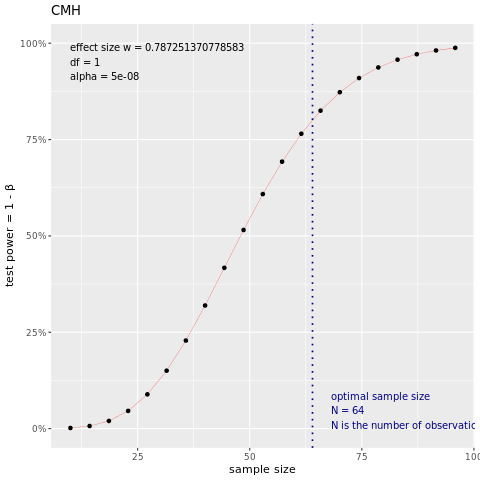

In [8]:
%%R
# votre code R
d_cmh <- sqrt(3)*log(4.17)/pi
print(d_cmh)
print(pwr.chisq.test(w = d_cmh, df = 1, N = 100, sig.level = 5e-8))

plot(pwr.chisq.test(w = d_cmh, df = 1, power = 0.80, sig.level = 5e-8), main="CMH")

#### **Q1.9:** Pour le CMH et les deux régions des gènes de l'INS et PTPN22, complétez les colonnes du Tableau 2 à partir des valeurs de l'article Onengut-Gumuscu et al. 2015 et tracez la courbe puissance ~ taille échantillon.

<center><b>Tableau 2.</b> Puissance pour les différents effectifs</center>

|  			région 		 	|  			50 		     	|  			100 		    	|  			200 		    	|  			300 		    	|  			500 		    	|
|----------	|----------	|----------	|----------	|----------	|----------	|
|  			CMH 		    	|  			55% 		 	|  			99% 		 	|  			100% 		 	|  			100% 		 	|  			100% 		   	|  			100% 		  	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|
|  			INS 		    	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|
|  			PTPN22 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|
|          	|          	|          	|          	|          	|          	|          	|          	|          	|          	|

*solution*

|  			région 		 	|  			50 		   	|  			100 		  	|  			200 		   	|  			300 		   	|  			500 		   	|
|----------	|--------	|--------	|---------	|---------	|---------	|
|  			CMH 		    	|  			55% 		 	|  			99% 		 	|  			100% 		 	|  			100% 		 	|  			100% 		   	|  			100% 		  	|  			<br>  			 		 	|  			<br>  			 		 	|  			<br>  			 		 	|
|  			INS 		    	|  			2% 		   	|  			25% 		 	|  			90% 		  	|  			99.8% 		 	|  			100% 		 	|  			100% 		 	|  			100% 		    	|  			<br>  			 		 	|  			<br>  			 		 	|
|  			PTPN22 		 	|  			0.1% 		   	|  			2.6% 		   	|  			3% 		    	|  			73% 		  	|  			99.2% 		  	|  			23.5 		 	|  			89.4 		   	|  			99.7 		   	|  			100 		    	|

In [9]:
%%R
cat("CMH")
for (i in c(50,100,200,300,500)){
   print(i)
    print(pwr.chisq.test(w=d_cmh,df=1, N=i, sig.level=5e-8))
}

cat("INS")
d_ins <- sqrt(3)*log(2.38)/pi
print(d_ins)

for (i in c(50,100,200,300,500)){
   print(i)
    print(pwr.chisq.test(w=d_ins,df=1, N=i, sig.level=5e-8))
}

cat("PTPN22")
d_ptpn22 <- sqrt(3)*log(1.89)/pi
print(d_ptpn22)

for (i in c(50,100,200,300,500)){
   print(i)
    print(pwr.chisq.test(w=d_ptpn22,df=1, N=i, sig.level=5e-8))
}



CMH[1] 50

     Chi squared power calculation 

              w = 0.7872514
              N = 50
             df = 1
      sig.level = 5e-08
          power = 0.5459349

NOTE: N is the number of observations

[1] 100

     Chi squared power calculation 

              w = 0.7872514
              N = 100
             df = 1
      sig.level = 5e-08
          power = 0.9922654

NOTE: N is the number of observations

[1] 200

     Chi squared power calculation 

              w = 0.7872514
              N = 200
             df = 1
      sig.level = 5e-08
          power = 1

NOTE: N is the number of observations

[1] 300

     Chi squared power calculation 

              w = 0.7872514
              N = 300
             df = 1
      sig.level = 5e-08
          power = 1

NOTE: N is the number of observations

[1] 500

     Chi squared power calculation 

              w = 0.7872514
              N = 500
             df = 1
      sig.level = 5e-08
          power = 1

NOTE: N is the number 

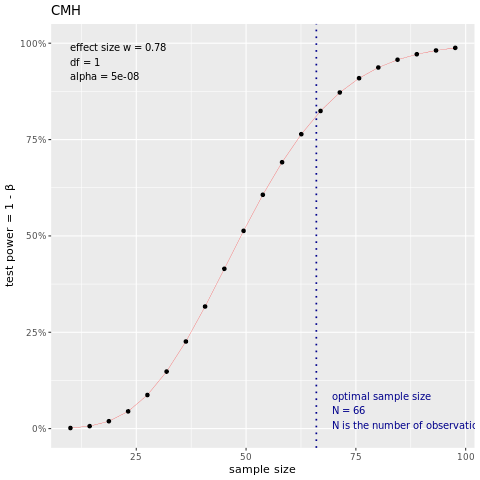

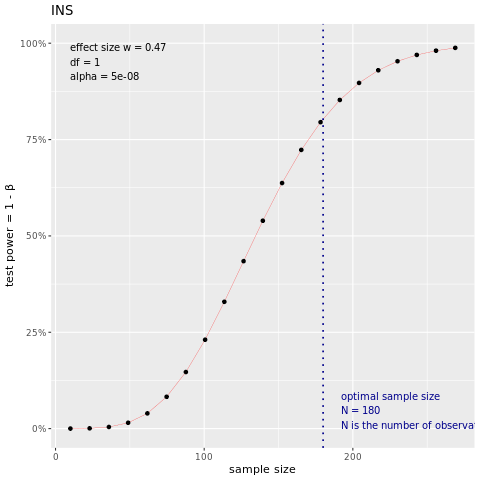

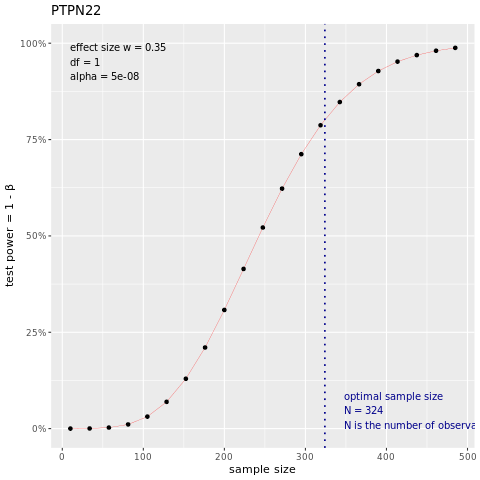

In [10]:
%%R
# votre code R
print(plot(pwr.chisq.test(w=0.78, df=1, power = 0.80,sig.level=5e-8), main="CMH"))
print(plot(pwr.chisq.test(w=0.47,df=1, power = 0.80,sig.level=5e-8), main="INS"))
print(plot(pwr.chisq.test(w=0.35, df=1, power = 0.80,sig.level=5e-8), main="PTPN22"))

#### **Q1.10:** Commentez les résultats.

<div class="alert alert-block alert-warning"><b>En pratique</b><br>
⚠️  On calcule la puissance avant tout projet afin de connaitre la taille des échantillons recquise pour mettre en évidence un effet minimum. Cependant, on recalcule la puissance à la fin de l'étude en fonction des fréquences alléliques effectivement estimées dans notre échantillon afin de s'assurer, en cas d'absence d'association, qu'on avait bien la puissance nécessaire. Pensez-y pour votre compte-rendu!</div>

---

<div class="alert alert-block alert-success"><b>=> Bravo!</b><br>

Vous êtes désormais prêts pour mener le GWAS "acs-contrôles". Suite du TP dans le prochain notebook!</div>